In [1]:
import subprocess
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
all_features = ["text_ tokens", "hashtags", "tweet_id", "present_media", "present_links", "present_domains",\
                "tweet_type","language", "tweet_timestamp", "engaged_with_user_id", "engaged_with_user_follower_count",\
               "engaged_with_user_following_count", "engaged_with_user_is_verified", "engaged_with_user_account_creation",\
               "enaging_user_id", "enaging_user_follower_count", "enaging_user_following_count", "enaging_user_is_verified",\
               "enaging_user_account_creation", "engagee_follows_engager"]
labels = ["reply_timestamp", "retweet_timestamp", "retweet_with_comment_timestamp", "like_timestamp"]

all_features_to_idx = dict(zip(all_features, range(len(all_features))))
labels_to_idx = dict(zip(labels, range(len(all_features), len(all_features)+len(labels))))

In [3]:
def unpack_to_df(package_name, sslice=None):
    out = subprocess.Popen(['lzop', '-dc', package_name], \
            stdout=subprocess.PIPE, \
            stderr=subprocess.STDOUT)
    lines, stderr = out.communicate()
    lines = lines.decode('utf-8').split('\n')
    if sslice is not None:
        lines = lines[sslice]
    lines = list(map(lambda line: line.split("\x01"), lines))
    lines = pd.DataFrame(lines, columns=all_features + labels)
    return lines

## Single package experiments

In [4]:
fp = "./data/part-00000.lzo"
df = unpack_to_df(fp)
df = df[df["tweet_id"].notnull()]

In [5]:
# rozmiar w GB
df.__sizeof__()

6072238473

In [6]:
df

,text_ tokens,hashtags,tweet_id,present_media,present_links,present_domains,tweet_type,language,tweet_timestamp,engaged_with_user_id,...,enaging_user_id,enaging_user_follower_count,enaging_user_following_count,enaging_user_is_verified,enaging_user_account_creation,engagee_follows_engager,reply_timestamp,retweet_timestamp,retweet_with_comment_timestamp,like_timestamp
0,101\t56898\t137\t10148\t96858\t18193\t11211\t1...,DF367A73CB84842E4A6080F624241703,C24EA5C3E19A388895D0FA05EA9E742F,Photo,,,Retweet,E7F038DE3EAD397AEC9193686C911677,1612712747,419BAC1CC63FF819E98CFC5EFF52DFDA,...,761EDF35532C3D3758DD01D33619D243,220,638,false,1464236635,false,,,,1612721339
1,101\t22800\t11206\t117\t13451\t20517\t25136\t1...,,2B41BDE7839DE3117D994FDFC9BDA6E1,,,,TopLevel,488B32D24BD4BB44172EB981C1BCA6FA,1614002023,547810FE65A44B3828FFA4587D1CA0C8,...,AE8B92F8CFE9F92C2942DEBBFE4F0FCF,392,487,false,1362687553,true,,,,
2,101\t119\t119\t119\t45857\t85270\t10169\t77086...,,BAF10FE3481E874ED104AC0950F18784,,,,Quote,488B32D24BD4BB44172EB981C1BCA6FA,1612452111,E18710A5B40F9187026AA49A220857BC,...,ED5574665DB1478CA23F13647178D9BE,1306,5000,false,1244857625,true,,,,1612457689
3,101\t160\t39187\t10237\t100\t11337\t100\t13028...,,BCDD3DDDA04C2E7843B3734620EE0C38,Photo,,,TopLevel,488B32D24BD4BB44172EB981C1BCA6FA,1612980390,0CC43EBBB61E292102397B8B08A73DDD,...,585F08165162A5C10DE2081ECFACCFC0,90,91,false,1551356429,false,,,,1612981097
4,101\t56898\t137\t40586\t10305\t53244\t22659\t1...,86458A61FFFA24A5624A9AD8AA2F0F52,43845DCDBC2A2CA15C3B18431F48F1F8,,,,Retweet,488B32D24BD4BB44172EB981C1BCA6FA,1612834174,29766FB1458BC9BB67EB7E61CBAB957C,...,CAD64086EF823706DEF953E615DB6743,158,411,false,1417656869,false,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3300766,101\t1894\t8367\t4678\t1895\t2006\t107110\t489...,,E778674CF16F9F9A8B6C8217D80A0B63,,E88710095B45EC1730C56DAF3A1BF1EB,F595B7DE8992A3D8C7948B4E81419D78,TopLevel,E7F038DE3EAD397AEC9193686C911677,1613218881,43FBB03F0F472A26EB8735BC985BA34A,...,F87340E8AC23AD01ECAEC1E536267BF2,242,438,false,1584362312,false,,,,
3300767,101\t85706\t111424\t16000\t58264\t28767\t69989...,B33235107B345DCA36B32897882A6218,0E36C6BCB99DE48B9F811F41CA8CB4FB,Photo\tPhoto,,,TopLevel,9FCF19233EAD65EA6E32C2E6DC03A444,1613544707,B3A5059C31ECD09D14AACE8126D2D427,...,379C45F2A355A36C7E34E4DF89A34E5B,5,237,false,1492798556,false,,,,1613552653
3300768,101\t56898\t137\t51555\t168\t168\t168\t38668\t...,2689FCF969EEF21F9CC5062DD464D40A,1A0D7D783F753B814646ADD9F619E5F7,Photo\tPhoto\tPhoto\tPhoto,,,Retweet,8729EBF694C3DAF61208A209C2A542C8,1613897649,367150B73ECF7D6C7AD9D957C36683B7,...,3D1A98E4FD4B431E7EF313D43CFC3252,145,243,false,1580204529,true,,1613898357,,1613898357
3300769,101\t12213\t30800\t30945\t21042\t898\t103021\t...,,7E03B780AAF34E40755567F0EFB00873,,,,TopLevel,B4DC2F82961F1263E90DF7A942CCE0B2,1614000510,2BCD379E4C2BF80F846D7C8CE4DCCFA9,...,B0E522A4B25BD5914163B479CA5A00AF,30,86,false,1590048148,false,,,,1614069533


## Followers graph

Created using user follows author relation. Unfortunatelly we don't have information about author follows user.

In [24]:
import networkx as nx

In [25]:
author_id_col = "enaging_user_id"
user_id_col = "engaged_with_user_id"
follow_col = "engagee_follows_engager"

In [20]:
df[follow_col] = df[follow_col].map({'true': True, 'false': False})

<ipython-input-20-2350bbaa9636>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["engagee_follows_engager"] = df["engagee_follows_engager"].map({'true': True, 'false': False})


In [79]:
def df_to_graph(dataframe):
    G = nx.DiGraph()
    for i, row in dataframe.iterrows():
        author_id = row[author_id_col]
        user_id = row[user_id_col]
        if not row[follow_col] and not G.has_edge(user_id, author_id):
            continue

        # user follows author
        G.add_edge(user_id, author_id)
    return G

In [ ]:
G = df_to_graph(df)

In [29]:
print(nx.info(G))

Name: 
Type: DiGraph
Number of nodes: 1987443
Number of edges: 1347694
Average in degree:   0.6781
Average out degree:   0.6781


### Component analysis

Reminder: Weakly connected components in directed graph are calculated by ignoring edge direction.

In [35]:
connected_compontents_count = nx.number_weakly_connected_components(undirected_G)
print("Number of connected components: ", connected_compontents_count)

Number of connected components:  654676


In [42]:
component_stats = [nx.info(nx.subgraph(G, c)) for c in sorted(nx.weakly_connected_components(G), key=len, reverse=True)[:10]]
for i, stats in enumerate(component_stats):
    print(f"====> Component {i}")
    print(stats)

====> Component 0
Name: 
Type: DiGraph
Number of nodes: 236019
Number of edges: 245647
Average in degree:   1.0408
Average out degree:   1.0408
====> Component 1
Name: 
Type: DiGraph
Number of nodes: 1331
Number of edges: 1388
Average in degree:   1.0428
Average out degree:   1.0428
====> Component 2
Name: 
Type: DiGraph
Number of nodes: 1319
Number of edges: 1384
Average in degree:   1.0493
Average out degree:   1.0493
====> Component 3
Name: 
Type: DiGraph
Number of nodes: 679
Number of edges: 734
Average in degree:   1.0810
Average out degree:   1.0810
====> Component 4
Name: 
Type: DiGraph
Number of nodes: 667
Number of edges: 671
Average in degree:   1.0060
Average out degree:   1.0060
====> Component 5
Name: 
Type: DiGraph
Number of nodes: 582
Number of edges: 610
Average in degree:   1.0481
Average out degree:   1.0481
====> Component 6
Name: 
Type: DiGraph
Number of nodes: 578
Number of edges: 623
Average in degree:   1.0779
Average out degree:   1.0779
====> Component 7
Name: 

### Degree analysis

In-degree and out-degree in directed graph

In [51]:
in_degrees = [degree for node, degree in G.in_degree()]
out_degrees = [degree for node, degree in G.out_degree()]

In [54]:
np.min(in_degrees), np.max(in_degrees)

(0, 49)

In [55]:
np.min(out_degrees), np.max(out_degrees)

(0, 442)

In [58]:
in_degree_hist = np.histogram(in_degrees, bins=49)
out_degree_hist = np.histogram(out_degrees, bins=442)

In [68]:
print("0-in-degree nodes (only author nodes): ", in_degree_hist[0][0])
print("0-out-degree nodes (only user nodes)", out_degree_hist[0][0])
print("Sum: ", in_degree_hist[0][0] + out_degree_hist[0][0])
print("Total nodes: ", len(G))
print("Difference (user & author nodes)", len(G) - (in_degree_hist[0][0] + out_degree_hist[0][0]))

0-in-degree nodes (only author nodes):  921825
0-out-degree nodes (only user nodes) 913035
Sum:  1834860
Total nodes:  1987443
Difference (user & author nodes) 152583


In [69]:
152583 / 1987443

0.07677352256140176

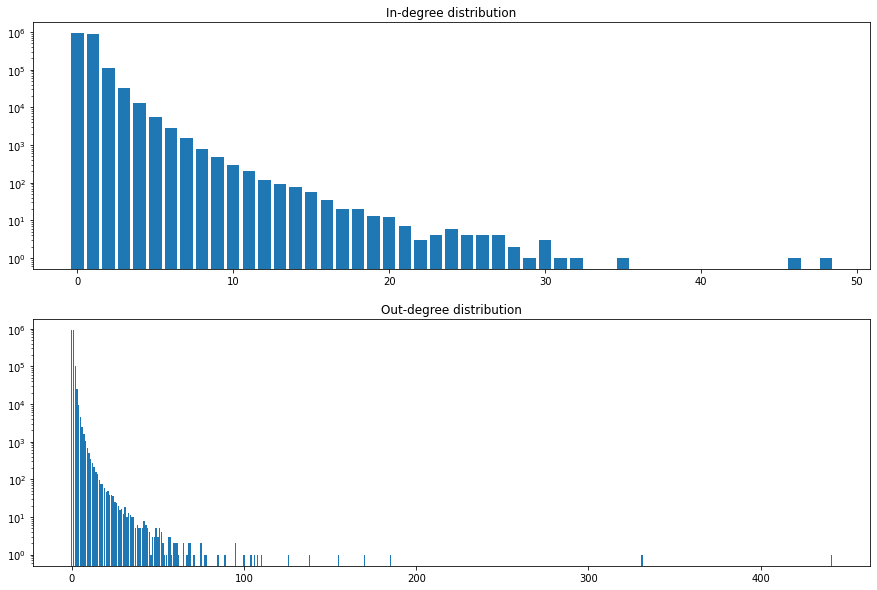

In [77]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 1, 1)
plt.bar(in_degree_hist[1][:-1], in_degree_hist[0])
plt.title("In-degree distribution")
plt.yscale("log")
plt.subplot(2, 1, 2)
plt.bar(out_degree_hist[1][:-1], out_degree_hist[0])
plt.title("Out-degree distribution")
plt.yscale("log")
plt.show()

## More data parts

In [78]:
fp_1 = "./data/part-00001.lzo"
fp_2 = "./data/part-00002.lzo"
fp_3 = "./data/part-00003.lzo"
df_1 = unpack_to_df(fp_1)
df_2 = unpack_to_df(fp_2)
df_3 = unpack_to_df(fp_3)

In [80]:
G_1 = df_to_graph(df_1)
G_2 = df_to_graph(df_2)
G_3 = df_to_graph(df_3)

In [88]:
# clear some memory
import gc

del df_1
df_1 = None
del df_2
df_2 = None
del df_3
df_3 = None
gc.collect()

128

In [84]:
common_nodes = set(G.nodes)
total_nodes = set(G.nodes)
for graph in [G_1, G_2, G_3]:
    common_nodes.intersection_update(graph.nodes)
    total_nodes.update(graph.nodes)
print("Total nodes:", len(total_nodes))
print("Common nodes:", len(common_nodes))

Total nodes: 8210563
Common nodes: 337057


In [90]:
joined_graph = G
for graph in [G_1, G_2, G_3]:
    joined_graph = nx.compose(joined_graph, graph)

In [92]:
print(nx.info(joined_graph))

Name: 
Type: DiGraph
Number of nodes: 8210563
Number of edges: 9965989
Average in degree:   1.2138
Average out degree:   1.2138


In [91]:
component_stats = [nx.info(nx.subgraph(joined_graph, c)) for c in sorted(nx.weakly_connected_components(joined_graph), key=len, reverse=True)[:10]]
for i, stats in enumerate(component_stats):
    print(f"====> Component {i}")
    print(stats)

====> Component 0
Name: 
Type: DiGraph
Number of nodes: 6265249
Number of edges: 8841402
Average in degree:   1.4112
Average out degree:   1.4112
====> Component 1
Name: 
Type: DiGraph
Number of nodes: 91
Number of edges: 95
Average in degree:   1.0440
Average out degree:   1.0440
====> Component 2
Name: 
Type: DiGraph
Number of nodes: 55
Number of edges: 55
Average in degree:   1.0000
Average out degree:   1.0000
====> Component 3
Name: 
Type: DiGraph
Number of nodes: 51
Number of edges: 50
Average in degree:   0.9804
Average out degree:   0.9804
====> Component 4
Name: 
Type: DiGraph
Number of nodes: 48
Number of edges: 51
Average in degree:   1.0625
Average out degree:   1.0625
====> Component 5
Name: 
Type: DiGraph
Number of nodes: 45
Number of edges: 44
Average in degree:   0.9778
Average out degree:   0.9778
====> Component 6
Name: 
Type: DiGraph
Number of nodes: 45
Number of edges: 47
Average in degree:   1.0444
Average out degree:   1.0444
====> Component 7
Name: 
Type: DiGraph

In [93]:
in_degrees = [degree for node, degree in joined_graph.in_degree()]
out_degrees = [degree for node, degree in joined_graph.out_degree()]

In [96]:
in_degree_hist = np.histogram(in_degrees, bins=np.max(in_degrees))
out_degree_hist = np.histogram(out_degrees, bins=np.max(out_degrees))

In [98]:
print("0-in-degree nodes (only author nodes): ", in_degree_hist[0][0])
print("0-out-degree nodes (only user nodes)", out_degree_hist[0][0])
print("Sum: ", in_degree_hist[0][0] + out_degree_hist[0][0])
print("Total nodes: ", len(joined_graph))
print("Difference (user & author nodes)", len(joined_graph) - (in_degree_hist[0][0] + out_degree_hist[0][0]))

0-in-degree nodes (only author nodes):  2852191
0-out-degree nodes (only user nodes) 4275374
Sum:  7127565
Total nodes:  8210563
Difference (user & author nodes) 1082998


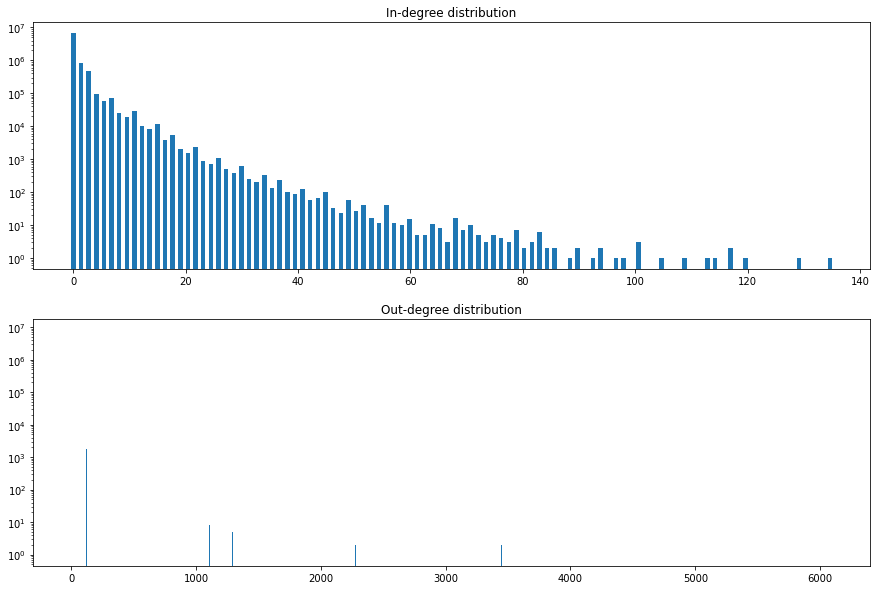

In [99]:
# lower the number of bins
in_degree_hist = np.histogram(in_degrees, bins=100)
out_degree_hist = np.histogram(out_degrees, bins=100)
# figs
plt.figure(figsize=(15, 10))
plt.subplot(2, 1, 1)
plt.bar(in_degree_hist[1][:-1], in_degree_hist[0])
plt.title("In-degree distribution")
plt.yscale("log")
plt.subplot(2, 1, 2)
plt.bar(out_degree_hist[1][:-1], out_degree_hist[0])
plt.title("Out-degree distribution")
plt.yscale("log")
plt.show()

### Node measurements

In [100]:
print("Page rank")
pr = nx.pagerank(joined_graph)
print("Eigenvector centrality")
ec = nx.eigenvector_centrality(joined_graph)

Page rank
Eigenvector centrality


In [112]:
sorted_pr = sorted(pr.items(), key=lambda x: x[1], reverse=True)
sorted_pr[:20]

[('CE1FECA5A0D58FFD7B001EA7D122F67A', 7.84946040633662e-06),
 ('64BDDA4D466C684D9501ADB4CBA13AC7', 6.032409952992961e-06),
 ('3F4FB57B7EF4830886641FF53F057B3C', 5.8162928897381406e-06),
 ('E68840D972D6E7E9A69DFF7C01651577', 5.670998807682496e-06),
 ('3E3FA02DAC6A4359B480C2E5C82FF03A', 5.664035773749552e-06),
 ('0C0691C500C6DAAA47ABBCA87ED11883', 5.2468687582293605e-06),
 ('5C8E7923BECBA099029D0C815558D239', 4.990160168167939e-06),
 ('6A7C43FE1A2BF2F6BD360CB6978F7BB0', 4.678168654466853e-06),
 ('FCC0066050DE98CBE80D223443A92546', 4.646699482675895e-06),
 ('30BC293F3524D2E13EBC6F972C51C2E1', 4.642592585574923e-06),
 ('29C7EFD2D70B0A55DFEE815A5271E814', 4.3377208881470224e-06),
 ('FBA41A7BC0ABABD7BC695D227019A4EF', 4.301913171874738e-06),
 ('89BAB28FDBCBD5A3127AFA37185927C5', 4.28696398338123e-06),
 ('3FDA38FA814E282924C89973A2204574', 4.265278511704612e-06),
 ('775BD9F4F42BFB39A9122738CD941854', 4.258332381403159e-06),
 ('EF492D9F087DD6E120958218A96A7265', 4.241798612819092e-06),
 ('B3AF

In [113]:
sorted_ec = sorted(ec.items(), key=lambda x: x[1], reverse=True)
sorted_ec[:20]

[('9CC8B955C8EFD746B1508DDD5FC34B93', 0.25033348618033435),
 ('5E3BEFCEA3D49FE5DAE8DD590EEC447A', 0.22017116200583348),
 ('C2ACD1555EAC8D625607538527B40F39', 0.11716767454752519),
 ('3945B46DAD1BC92DE7280CC43DA6C76E', 0.1167860189093247),
 ('741ADD9C4140F14517FC92EB565A31EB', 0.10946949384404925),
 ('2D41DDEBE46310C1C3217D0734298450', 0.1094230868751433),
 ('378DAE59DD2B9D72AC3E1D215AC2FA64', 0.10647464859407574),
 ('FE9EA664DD6B25595F8885635D846C35', 0.10582287670003991),
 ('F481F949CCC8570EE754C3478481D273', 0.10518080653668303),
 ('DB56061AA6624363608AED6CD9940BC1', 0.09882399014308592),
 ('D75C4AB3E46399472D005A32852430B3', 0.09704776504794843),
 ('4B70BF5DB66BEE03765A2311C5C8688B', 0.09536727080523305),
 ('FCC0C7EB38D49E903AFFE836315BFE8B', 0.09407427593474511),
 ('62FF4A43CA04C9FA31EB16738CAB64B8', 0.09312704871267526),
 ('8645CE67A97053E96BD462A4319F7377', 0.09247587637362074),
 ('A98CD4EEFC88FEDF9919229A49C6E2E3', 0.09068267972279913),
 ('042B7180D5948601E56552595E29D159', 0.08

### Podsumowanie

#### Jedna paczka
* praktycznie równy średni in_degree i out_degree + rozkład stopnii wskazuje na to, graf można podzielić na autorów i userów, z mniejszą liczbą wierzchołków będących autorami-userami (16%)
* większa liczba wierzchołków niż krawędzi 
* jedna większa składowa i wiele pomniejszych, skladających sie z od 100-1000 node'ów

### Wiele paczek
* mało wspolnych wierzchołków (4%)
* formuje się jeden dominujący komponent z udziałem 76%, reszta to bardzo małe składowe składające się z kilkudziesięciu węzłów
* zmniejsza się liczba tylko-autorów